In [2]:
import pandas as pd
import numpy as np

In [4]:
# read dataset

df=pd.read_excel("core_dataset.xlsx", engine="openpyxl")
df.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N,HasSafetyRec,...,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,ReportStatus,RepGenFlag,DocketUrl,DocketPublishDate
0,CEN25LA162,ACC,200057,2025-04-22T13:25:00Z,Fayetteville,Arkansas,United States,NaN,N4795C,False,...,NaN,NaN,NaN,NaN,NaN,NaN,In work,False,NaN,NaT
1,ENG25WA030,INC,200056,2025-04-22T04:00:00Z,Budapest,NaN,Hungary,NaN,SP-RZUb,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaT
2,DCA25LA190,ACC,200055,2025-04-20T04:00:00Z,Tulsa,Oklahoma,United States,NaN,N461WN,False,...,SCHD,NaN,121,NaN,NaN,SOUTHWEST AIRLINES CO,In work,False,NaN,NaT
3,WPR25LA138,ACC,200048,2025-04-19T11:42:00Z,Hood River,Oregon,United States,NaN,N5786S,False,...,NaN,INST,91,Substantial,VMC,HOOD RIVER SOARING INC,In work,False,NaN,NaT
4,WPR25LA136,ACC,200044,2025-04-19T11:06:00Z,Phoenix,Arizona,United States,NaN,N321WC,False,...,NaN,NaN,NaN,NaN,NaN,NaN,In work,False,NaN,NaT


# Data Processing
- columns that are needed: `Country`, `State`, `Make`
- delete missing values(State: exist structural missing, therefore can also be deleted directly) 
- add weights (`FatalInjuryCount`-3, `SeriousInjuryCount`-2, `MinorInjuryCount`-1)-no missing values
- set `stateblock`

In [6]:
df.columns

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'ReportNo', 'N', 'HasSafetyRec', 'ReportType', 'OriginalPublishDate',
       'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'ProbableCause', 'EventID', 'Latitude', 'Longitude',
       'Make', 'Model', 'AirCraftCategory', 'AirportID', 'AirportName',
       'AmateurBuilt', 'NumberOfEngines', 'Scheduled', 'PurposeOfFlight',
       'FAR', 'AirCraftDamage', 'WeatherCondition', 'Operator', 'ReportStatus',
       'RepGenFlag', 'DocketUrl', 'DocketPublishDate'],
      dtype='object')

In [7]:
df_airbus = df[df['Make'].str.contains('Airbus', case=False, na=False)]
df_boeing = df[df['Make'].str.contains('Boeing', case=False, na=False)]
df_airbus.shape

(422, 37)

In [8]:
df_boeing.shape

(1542, 37)

In [9]:
# The percentage of missing values in all Companies

df['Make'].isna().mean()

np.float64(0.0010727908455181183)

In [10]:
df_cleaned = df.dropna(subset=['Make'])

In [11]:
df_cleaned['Make'].isna().sum()

np.int64(0)

In [12]:
df_cleaned = df.dropna(subset=['Country'])

In [13]:
df_cleaned['Country'].isna().sum()

np.int64(0)

## structural missing detection

In [15]:
df_cleaned['State'].isna().sum()

np.int64(4904)

In [26]:
# whether City is missing if State is missing
df[df['State'].isna()]['City'].isna().mean()

np.float64(0.0016299918500407497)

In [28]:
df[['FatalInjuryCount', 'SeriousInjuryCount','MinorInjuryCount']].dtypes

FatalInjuryCount      int64
SeriousInjuryCount    int64
MinorInjuryCount      int64
dtype: object

In [30]:
df_cleaned = df.dropna(subset=['State'])

In [32]:
df_cleaned['State'].isna().sum()

np.int64(0)

In [34]:
df_cleaned.shape

(20260, 37)

In [36]:
df_cleaned['FatalInjuryCount'].isna().sum()

np.int64(0)

In [38]:
df_cleaned['SeriousInjuryCount'].isna().sum()

np.int64(0)

In [40]:
df_cleaned['MinorInjuryCount'].isna().sum()

np.int64(0)

In [42]:
# add weights
df_cleaned['WeightedInjuryScore'] = (
    df_cleaned['FatalInjuryCount'].fillna(0) * 3 +
    df_cleaned['SeriousInjuryCount'].fillna(0) * 2 +
    df_cleaned['MinorInjuryCount'].fillna(0) * 1
)

/var/folders/c_/7thpxjgs3m38yh7ftdr5g7vm0000gn/T/ipykernel_9720/4017550443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['WeightedInjuryScore'] = (


# Stock Dataset Processing

In [45]:
df_airbus=pd.read_csv("AIR.PA.csv")
df_airbus.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2009/1/2,12.100,12.630,11.860,12.630,9.872783,1702735,NaN,NaN
1,2009/1/5,12.700,13.440,12.695,13.440,10.505952,2628493,NaN,NaN
2,2009/1/6,13.445,13.925,13.430,13.780,10.771729,2797192,NaN,NaN
3,2009/1/7,13.655,13.800,13.320,13.605,10.634932,2319050,NaN,NaN
4,2009/1/8,13.360,13.490,13.100,13.420,10.490321,2219720,NaN,NaN


In [47]:
df_airbus.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [49]:
# Skip the first two lines and specify the correct column names
col_names = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_boeing = pd.read_csv("boeing_stock_2010_2025.csv", skiprows=2, names=col_names)
df_boeing = df_boeing.drop(index=0).reset_index(drop=True)
df_boeing.head()

,Date,Close,High,Low,Open,Volume
0,2010-01-04,43.777546,43.941185,42.702198,43.419098,6186700.0
1,2010-01-05,45.211349,45.413950,43.637290,43.832099,8867800.0
2,2010-01-06,46.582802,46.746444,45.102253,45.374985,8836500.0
3,2010-01-07,48.468555,48.554272,45.990581,46.372405,14379100.0
4,2010-01-08,48.001015,48.141278,47.424381,47.954262,7146600.0


In [51]:
df_boeing.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [53]:
df_airbus['Adj Close'].isna().sum()

np.int64(0)

In [55]:
df_boeing['Close'].isna().sum()

np.int64(0)

In [57]:
df_airbus.shape

(4172, 9)

In [59]:
df_boeing.shape

(3774, 6)

## For standardized price (model2)

In [62]:
df_airbus['Date'] = pd.to_datetime(df_airbus['Date'])
df_airbus = df_airbus[df_airbus['Date'] >= '2010-01-01'] # only 2010-2025
df_airbus = df_airbus[['Date', 'Close']].copy()
df_airbus['Company'] = 'AIRBUS'

In [64]:
df_boeing['Date'] = pd.to_datetime(df_boeing['Date'])
df_boeing = df_boeing[['Date', 'Close']].copy()
df_boeing['Company'] = 'BOEING'

In [66]:
# Standardize Close prices within each company
df_airbus['Close'] = (df_airbus['Close'] - df_airbus['Close'].mean()) / df_airbus['Close'].std()
df_boeing['Close'] = (df_boeing['Close'] - df_boeing['Close'].mean()) / df_boeing['Close'].std()

In [68]:
# Merge the two datasets
df_stock = pd.concat([df_airbus, df_boeing], ignore_index=True)
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Check the merged result
print(df_stock.head())
print(df_stock['Company'].value_counts())

        Date     Close Company
0 2010-01-04 -1.512281  AIRBUS
1 2010-01-05 -1.513362  AIRBUS
2 2010-01-06 -1.510360  AIRBUS
3 2010-01-07 -1.506997  AIRBUS
4 2010-01-08 -1.503635  AIRBUS
Company
AIRBUS    3916
BOEING    3774
Name: count, dtype: int64


# Model2
- **Detect whether the accident has caused a "systemic change" in prices.**

In [71]:
print(df[df['EventType'] == 'ACC']['Make'].value_counts())

Make
CESSNA                            4952
PIPER                             2904
BEECH                             1037
Cessna                             764
BELL                               580
                                  ... 
SCHEMPP-HIRTH FLUGZEUGBAU GMBH       1
COLUMBIA                             1
ROBERT MILES                         1
SAFARI                               1
GRUMMAN AMERICAN                     1
Name: count, Length: 3837, dtype: int64


In [73]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df['Make'] = df['Make'].str.upper()



# Notice: exact and only extract all Accidents(ACC)
# Notice: Each company corresponds to the data within the accident window on its own
df_events = df[
    (df['EventType'] == 'ACC') &
    (df['Make'].isin(['BOEING', 'AIRBUS']))
][['EventDate', 'Make']].rename(columns={'EventDate': 'Date', 'Make': 'Company'})
#df_events = df_events[['EventDate', 'Make']].rename(columns={'EventDate': 'Date', 'Make': 'Company'})
df_events['Date'] = pd.to_datetime(df_events['Date'])

In [74]:
##################################
# create Lagged Period（+,-10 days）#
##################################

lagged_dates = []
for _, row in df_events.iterrows():
    for offset in range(-10, 11):
        lagged_dates.append({
            'Date': row['Date'] + pd.Timedelta(days=offset),
            'Company': row['Company']
        })

df_lagged = pd.DataFrame(lagged_dates)

In [75]:
print(df_lagged['Company'].value_counts())

Company
BOEING    11067
AIRBUS     2205
Name: count, dtype: int64


In [76]:
# make sure the same data type
df_lagged['Date'] = df_lagged['Date'].dt.tz_localize(None)
df_stock['Date'] = df_stock['Date'].dt.tz_localize(None)

In [81]:
# Labe：LaggedPeriod / Normal

#initialize
df_stock['PeriodType'] = 'NormalPeriod'
df_stock = df_stock.merge(df_lagged.assign(PeriodType='LaggedPeriod'),
                          on=['Date', 'Company'],
                          how='left',
                          suffixes=('', '_y'))
df_stock['PeriodType'] = df_stock['PeriodType_y'].combine_first(df_stock['PeriodType'])
df_stock.drop(columns=['PeriodType_y'], inplace=True)

In [83]:
print(df_stock[df_stock['PeriodType'] == 'LaggedPeriod']['Company'].value_counts())

Company
BOEING    43
AIRBUS    14
Name: count, dtype: int64


In [85]:
print(df_stock['PeriodType'].value_counts())

PeriodType
NormalPeriod    7633
LaggedPeriod      57
Name: count, dtype: int64


In [87]:
# 1. PeriodType 
df_normal = df_stock[df_stock['PeriodType'] == 'NormalPeriod']
df_lagged = df_stock[df_stock['PeriodType'] == 'LaggedPeriod']

# 2. Sample the NormalPeriod in layers to match the number of Laggedperiods
df_balanced_normal = (
    df_normal.groupby('Company')
    .apply(lambda x: x.sample(n=df_lagged[df_lagged['Company'] == x.name].shape[0], random_state=42))
    .reset_index(drop=True)
)

# 3. combined into df_balanced
df_balanced = pd.concat([df_balanced_normal, df_lagged], ignore_index=True)

/var/folders/c_/7thpxjgs3m38yh7ftdr5g7vm0000gn/T/ipykernel_9720/1221456549.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=df_lagged[df_lagged['Company'] == x.name].shape[0], random_state=42))


In [89]:
print(df_balanced.groupby(['Company', 'PeriodType']).size())

Company  PeriodType  
AIRBUS   LaggedPeriod    14
         NormalPeriod    14
BOEING   LaggedPeriod    43
         NormalPeriod    43
dtype: int64


In [91]:
# ANOVA（Blocking by Company）
model_inter = ols('Close ~ C(PeriodType) * C(Company)', data=df_balanced).fit()
anova_results_inter = anova_lm(model_inter, typ=2)
print(anova_results_inter)

                             sum_sq     df          F    PR(>F)
C(PeriodType)             10.070927    1.0  14.810573  0.000200
C(Company)                 8.443509    1.0  12.417249  0.000621
C(PeriodType):C(Company)   5.146578    1.0   7.568695  0.006947
Residual                  74.798049  110.0        NaN       NaN


In [93]:
print(df_balanced.groupby(['Company', 'PeriodType']).size())

Company  PeriodType  
AIRBUS   LaggedPeriod    14
         NormalPeriod    14
BOEING   LaggedPeriod    43
         NormalPeriod    43
dtype: int64


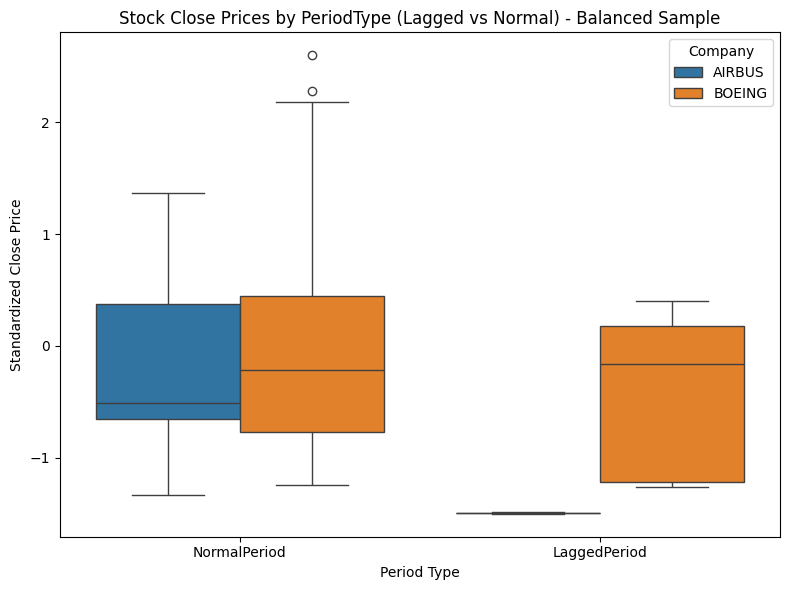

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_balanced,
    x='PeriodType',
    y='Close',
    hue='Company'
)
plt.title('Stock Close Prices by PeriodType (Lagged vs Normal) - Balanced Sample')
plt.ylabel('Standardized Close Price')
plt.xlabel('Period Type')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

# Model3
- **Detect whether the accident affects the "fluctuation intensity" of the price and whether it has a differential impact on the company.**

## For original price(Model3)

In [99]:
df_stock.head()

,Date,Close,Company,PeriodType
0,2010-01-04,-1.512281,AIRBUS,NormalPeriod
1,2010-01-05,-1.513362,AIRBUS,NormalPeriod
2,2010-01-06,-1.510360,AIRBUS,NormalPeriod
3,2010-01-07,-1.506997,AIRBUS,NormalPeriod
4,2010-01-08,-1.503635,AIRBUS,NormalPeriod


In [268]:
df_airbus_raw=pd.read_csv("AIR.PA.csv")
df_airbus_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2009/1/2,12.100,12.630,11.860,12.630,9.872783,1702735,NaN,NaN
1,2009/1/5,12.700,13.440,12.695,13.440,10.505952,2628493,NaN,NaN
2,2009/1/6,13.445,13.925,13.430,13.780,10.771729,2797192,NaN,NaN
3,2009/1/7,13.655,13.800,13.320,13.605,10.634932,2319050,NaN,NaN
4,2009/1/8,13.360,13.490,13.100,13.420,10.490321,2219720,NaN,NaN


In [270]:
# Skip the first two lines and specify the correct column names
col_names = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_boeing_raw = pd.read_csv("boeing_stock_2010_2025.csv", skiprows=2, names=col_names)
df_boeing_raw = df_boeing_raw.drop(index=0).reset_index(drop=True)
df_boeing_raw.head()

,Date,Close,High,Low,Open,Volume
0,2010-01-04,43.777546,43.941185,42.702198,43.419098,6186700.0
1,2010-01-05,45.211349,45.413950,43.637290,43.832099,8867800.0
2,2010-01-06,46.582802,46.746444,45.102253,45.374985,8836500.0
3,2010-01-07,48.468555,48.554272,45.990581,46.372405,14379100.0
4,2010-01-08,48.001015,48.141278,47.424381,47.954262,7146600.0


In [272]:
df_airbus_raw['Date'] = pd.to_datetime(df_airbus_raw ['Date'])
df_airbus_raw = df_airbus_raw [df_airbus_raw ['Date'] >= '2010-01-01']
df_airbus_raw  = df_airbus_raw [['Date', 'Close']].copy()
df_airbus_raw ['Company'] = 'AIRBUS'

In [274]:
df_boeing_raw['Date'] = pd.to_datetime(df_boeing_raw['Date'])
df_boeing_raw = df_boeing_raw[['Date', 'Close']].copy()
df_boeing_raw['Company'] = 'BOEING'

In [276]:
# Merge two datasets
df_stock_raw = pd.concat([df_airbus_raw, df_boeing_raw], ignore_index=True)
df_stock_raw['Date'] = pd.to_datetime(df_stock_raw['Date'])

# check the merged result
print(df_stock_raw.head())
print(df_stock_raw['Company'].value_counts())

        Date   Close Company
0 2010-01-04  13.990  AIRBUS
1 2010-01-05  13.945  AIRBUS
2 2010-01-06  14.070  AIRBUS
3 2010-01-07  14.210  AIRBUS
4 2010-01-08  14.350  AIRBUS
Company
AIRBUS    3916
BOEING    3774
Name: count, dtype: int64


In [278]:
# basically same as model2

df['Make'] = df['Make'].str.upper()

# Filter to fatal accidents only
df_fatal = df[
    (df["EventType"] == "ACC") &
    (df["Make"].isin(['BOEING','AIRBUS']))
][['EventDate','Make']].rename(columns={"EventDate": "Date", "Make": "Company"})

df_fatal['Date'] = pd.to_datetime(df_fatal['Date'])

# Create list of dates within (-,+ 10) days of each fatal accident for the same company
expanded_dates = []
for _, row in df_fatal.iterrows():
    for offset in range(-10, 11):
        expanded_dates.append({
            "Date": row["Date"] + pd.Timedelta(days=offset),
            "Company": row["Company"]
        })
df_fatal_window = pd.DataFrame(expanded_dates)

In [280]:
print(df_fatal_window['Company'].value_counts())

Company
BOEING    11067
AIRBUS     2205
Name: count, dtype: int64


In [282]:
df_stock_raw['Date'] = df_stock_raw['Date'].dt.tz_localize(None)
df_fatal_window['Date'] = df_fatal_window['Date'].dt.tz_localize(None)


# Add column to stock data
df_stock_raw["PeriodType"] = "NormalPeriod"
df_stock_raw = df_stock_raw.merge(
    df_fatal_window.assign(PeriodType="FatalAccidentPeriod"),
    on=["Date", "Company"],
    how="left",
    suffixes=('', '_y')
)
df_stock_raw["PeriodType"] = df_stock_raw["PeriodType_y"].combine_first(df_stock_raw["PeriodType"])
df_stock_raw = df_stock_raw.drop(columns=["PeriodType_y"])

# View result
print(df_stock_raw.head())

        Date   Close Company    PeriodType
0 2010-01-04  13.990  AIRBUS  NormalPeriod
1 2010-01-05  13.945  AIRBUS  NormalPeriod
2 2010-01-06  14.070  AIRBUS  NormalPeriod
3 2010-01-07  14.210  AIRBUS  NormalPeriod
4 2010-01-08  14.350  AIRBUS  NormalPeriod


In [288]:
print(df_stock_raw['PeriodType'].value_counts())

PeriodType
NormalPeriod           7633
FatalAccidentPeriod      57
Name: count, dtype: int64


In [290]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, wls

# extract season as block
df_stock_raw['Quarter'] = pd.to_datetime(df_stock_raw['Date']).dt.quarter
df_stock_raw

,Date,Close,Company,PeriodType,Quarter
0,2010-01-04,13.990000,AIRBUS,NormalPeriod,1
1,2010-01-05,13.945000,AIRBUS,NormalPeriod,1
2,2010-01-06,14.070000,AIRBUS,NormalPeriod,1
3,2010-01-07,14.210000,AIRBUS,NormalPeriod,1
4,2010-01-08,14.350000,AIRBUS,NormalPeriod,1
...,...,...,...,...,...
7685,2024-12-24,179.339996,BOEING,NormalPeriod,4
7686,2024-12-26,180.380005,BOEING,NormalPeriod,4
7687,2024-12-27,180.720001,BOEING,NormalPeriod,4
7688,2024-12-30,176.550003,BOEING,NormalPeriod,4


In [292]:
quarterly_avg = df_stock_raw.groupby(['Quarter', 'Company'])['Close'].mean().reset_index()

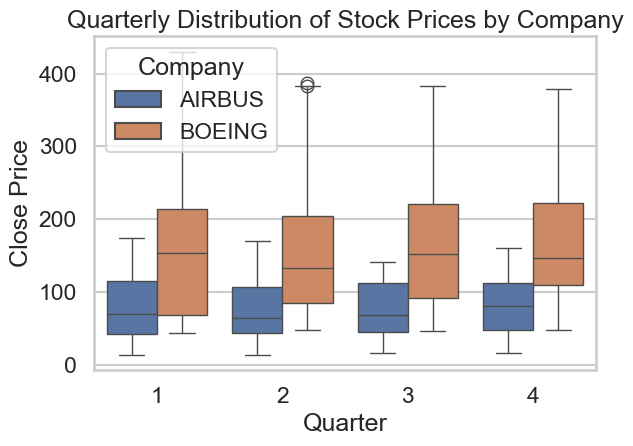

In [294]:
sns.boxplot(data=df_stock_raw, x='Quarter', y='Close', hue='Company')
plt.title('Quarterly Distribution of Stock Prices by Company')
plt.xlabel('Quarter')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

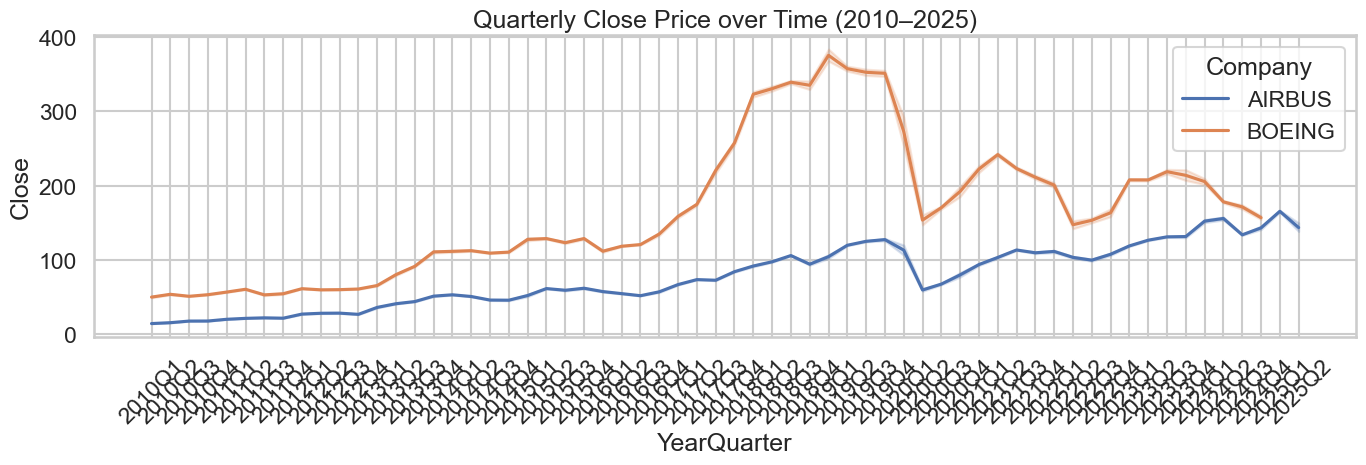

In [296]:
# create Year-Quarter column
df_stock_raw['YearQuarter'] = pd.to_datetime(df_stock_raw['Date']).dt.to_period('Q').astype(str)


# plot（show price based on time sequence）
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_stock_raw, x='YearQuarter', y='Close', hue='Company')
plt.xticks(rotation=45)
plt.title('Quarterly Close Price over Time (2010–2025)')
plt.tight_layout()
plt.show()

In [352]:
# log return
df_stock_raw['log_return'] = np.log(df_stock_raw['Close']).diff()

# rolling volatility（5）
df_stock_raw['rolling_std'] = df_stock_raw['log_return'].rolling(window=5).std()

In [354]:
# reset subset
df_airbus_raw = df_stock_raw[df_stock_raw['Company'] == 'AIRBUS']
df_boeing_raw = df_stock_raw[df_stock_raw['Company'] == 'BOEING']

In [356]:
df_airbus_raw

,Date,Close,Company,PeriodType,Quarter,YearQuarter,log_return,rolling_std
0,2010-01-04,13.990000,AIRBUS,NormalPeriod,1,2010Q1,NaN,NaN
1,2010-01-05,13.945000,AIRBUS,NormalPeriod,1,2010Q1,-0.003222,NaN
2,2010-01-06,14.070000,AIRBUS,NormalPeriod,1,2010Q1,0.008924,NaN
3,2010-01-07,14.210000,AIRBUS,NormalPeriod,1,2010Q1,0.009901,NaN
4,2010-01-08,14.350000,AIRBUS,NormalPeriod,1,2010Q1,0.009804,NaN
...,...,...,...,...,...,...,...,...
3911,2025-04-14,139.259995,AIRBUS,NormalPeriod,2,2025Q2,0.032105,0.042043
3912,2025-04-15,140.940002,AIRBUS,NormalPeriod,2,2025Q2,0.011992,0.040792
3913,2025-04-16,140.500000,AIRBUS,NormalPeriod,2,2025Q2,-0.003127,0.030433
3914,2025-04-17,136.460007,AIRBUS,NormalPeriod,2,2025Q2,-0.029176,0.027686


In [358]:
print(df_airbus_raw['PeriodType'].value_counts())

PeriodType
NormalPeriod           3902
FatalAccidentPeriod      14
Name: count, dtype: int64


In [360]:
# subset
df_airbus_raw = df_stock_raw[df_stock_raw['Company'] == 'AIRBUS'].copy()

In [364]:
#################################
# ------- Analysis: Airbus -------
#################################
# drop missing value
df_airbus_raw = df_airbus_raw.dropna(subset=['rolling_std'])

# OLS (for residual)
model_ols_airbus = ols('rolling_std ~ C(PeriodType) + C(Quarter)', data=df_airbus_raw).fit()
weights_airbus = 1 / (model_ols_airbus.resid ** 2)

model_wls_airbus = sm.WLS.from_formula(
    'rolling_std ~ C(PeriodType) + C(Quarter)',
    data=df_airbus_raw,
    weights=weights_airbus
).fit()

anova_wls_airbus = sm.stats.anova_lm(model_wls_airbus, typ=2)
print(anova_wls_airbus)

                     sum_sq      df             F        PR(>F)
C(PeriodType)    408.402814     1.0    408.638531  1.672662e-86
C(Quarter)     59891.183065     3.0  19975.250143  0.000000e+00
Residual        3903.746876  3906.0           NaN           NaN


In [366]:
#################################
# ------- analyzsis: Boeing -------
#################################

df_boeing_raw = df_stock_raw[df_stock_raw['Company'] == 'BOEING'].copy()

model_ols_boeing = ols('rolling_std ~ C(PeriodType) + C(Quarter)', data=df_boeing_raw).fit()
weights_boeing = 1 / (model_ols_boeing.resid ** 2)

model_wls_boeing = sm.WLS.from_formula(
    'rolling_std ~ C(PeriodType) + C(Quarter)',
    data=df_boeing_raw,
    weights=weights_boeing
).fit()

anova_wls_boeing = sm.stats.anova_lm(model_wls_boeing, typ=2)
print(anova_wls_boeing)


                      sum_sq      df              F    PR(>F)
C(PeriodType)       9.902544     1.0       9.910649  0.001656
C(Quarter)     950085.167749     3.0  316954.273701  0.000000
Residual         3765.917562  3769.0            NaN       NaN


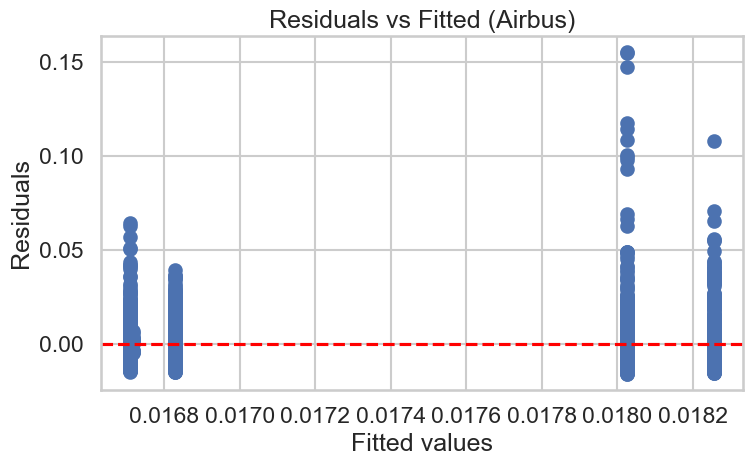

In [380]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# model_wls_airbus
fitted_vals = model_wls_airbus.fittedvalues
residuals = model_wls_airbus.resid

# Residuals vs Fitted
plt.figure(figsize=(8, 5))
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted (Airbus)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

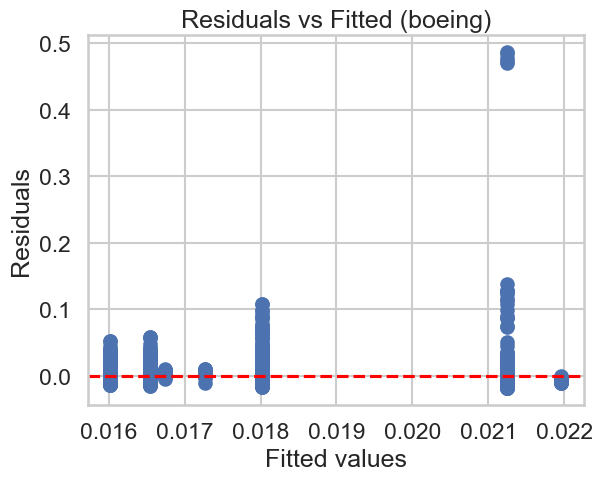

In [370]:
#  model_wls_boeing
fitted_vals = model_wls_boeing.fittedvalues
residuals = model_wls_boeing.resid

# Residuals vs Fitted
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted (boeing)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


In [372]:
# Interaction effect analysis: 
# Whether different companies have different fluctuating performances during the accident
model_interaction = ols(
    'rolling_std ~ C(PeriodType) * C(Company) + C(Quarter)',
    data=df_stock_raw
).fit()

anova_interaction = sm.stats.anova_lm(model_interaction, typ=2)
print(anova_interaction)


                            sum_sq      df          F        PR(>F)
C(PeriodType)             0.000026     1.0   0.081746  7.749528e-01
C(Company)                0.000503     1.0   1.579429  2.088811e-01
C(Quarter)                0.012489     3.0  13.075398  1.629906e-08
C(PeriodType):C(Company)  0.000060     1.0   0.188221  6.644137e-01
Residual                  2.444490  7678.0        NaN           NaN
